<a href="https://colab.research.google.com/github/cyber-noob/MachineHack/blob/main/MachineHack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
store = pd.read_csv('/content/drive/My Drive/Participants_Data_TGIH/Train.csv') #Load the data

**EDA**

In [22]:
store.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [23]:
store.describe()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
count,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000,284780.000000
mean,9955.394083,1573.386807,2023.955573,12.028468,3.451216,15288.224278,32.823846
std,5551.519138,843.604991,1089.812078,295.111588,78.399541,1714.336529,6.743602
min,0.000000,0.000000,0.000000,-80995.000000,0.000000,12346.000000,0.000000
25%,5069.000000,939.000000,1141.000000,2.000000,1.250000,13953.000000,35.000000
50%,10310.000000,1521.000000,1987.000000,5.000000,1.950000,15152.000000,35.000000
75%,14657.000000,2106.000000,2945.000000,12.000000,3.750000,16794.000000,35.000000
max,22188.000000,3683.000000,3895.000000,80995.000000,38970.000000,18287.000000,36.000000


In [24]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    284780 non-null  int64  
 1   StockCode    284780 non-null  int64  
 2   Description  284780 non-null  int64  
 3   Quantity     284780 non-null  int64  
 4   InvoiceDate  284780 non-null  object 
 5   UnitPrice    284780 non-null  float64
 6   CustomerID   284780 non-null  float64
 7   Country      284780 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 17.4+ MB


In [25]:
#Set Seaborn
sns.set(rc={'figure.figsize':(20,5)})

In [26]:
#Function to easily prepare the dataset
def prep_data(store):
  store['InvoiceDate'] = pd.to_datetime(store['InvoiceDate'])
  store['Date'] = store['InvoiceDate'].dt.date
  store['Time'] = store['InvoiceDate'].dt.time
  store['Date'] = pd.to_datetime(store['Date'])
  store['Day'] = store['Date'].dt.day
  store['Month'] = store['Date'].dt.month
  store['Year'] = store['Date'].dt.year
  store['Week'] = store['InvoiceDate'].dt.isocalendar().week
  store.drop(axis=1,columns=['CustomerID','InvoiceNo','InvoiceDate','Date','Time'],inplace=True)

  return store

In [27]:
store = prep_data(store)

In [28]:
store.head()

,StockCode,Description,Quantity,UnitPrice,Country,Day,Month,Year,Week
0,1583,144,3,3.75,35,6,5,2011,18
1,1300,3682,6,1.95,35,11,5,2011,19
2,2178,1939,4,5.95,35,20,11,2011,46
3,2115,2983,1,0.83,35,22,11,2011,47
4,1210,2886,12,1.65,35,6,5,2011,18


In [29]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284780 entries, 0 to 284779
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   StockCode    284780 non-null  int64  
 1   Description  284780 non-null  int64  
 2   Quantity     284780 non-null  int64  
 3   UnitPrice    284780 non-null  float64
 4   Country      284780 non-null  int64  
 5   Day          284780 non-null  int64  
 6   Month        284780 non-null  int64  
 7   Year         284780 non-null  int64  
 8   Week         284780 non-null  UInt32 
dtypes: UInt32(1), float64(1), int64(7)
memory usage: 18.7 MB


In [30]:
store.drop(store[store['UnitPrice'] == 0].index, inplace=True)

In [31]:
store = store.reset_index().drop(['index'],axis=1)
store.head()

,StockCode,Description,Quantity,UnitPrice,Country,Day,Month,Year,Week
0,1583,144,3,3.75,35,6,5,2011,18
1,1300,3682,6,1.95,35,11,5,2011,19
2,2178,1939,4,5.95,35,20,11,2011,46
3,2115,2983,1,0.83,35,22,11,2011,47
4,1210,2886,12,1.65,35,6,5,2011,18


In [32]:
#Outlier Detection
from sklearn.svm import OneClassSVM

ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(store['Quantity'].values.reshape(-1,1))

In [33]:
for i in np.where(yhat==-1):
  store.loc[i, 'Quantity'] = store['Quantity'].mean() #Replace all the values of the detected outliers with the mean of the data

In [34]:
store['Quantity'] = store['Quantity'].abs() #Replacing Negative values with the positive ones since we assume that Quantity cannot be negative

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


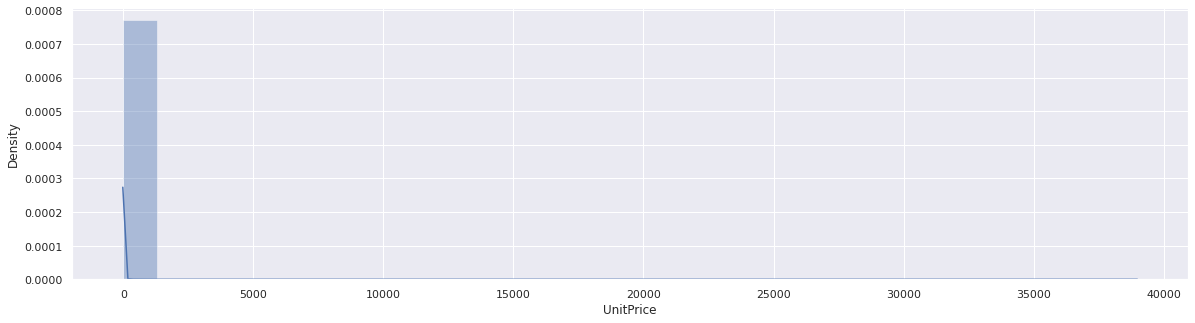

In [35]:
sns.distplot(store['UnitPrice'],bins=30,kde=True) #Heavily Left Skewed Data

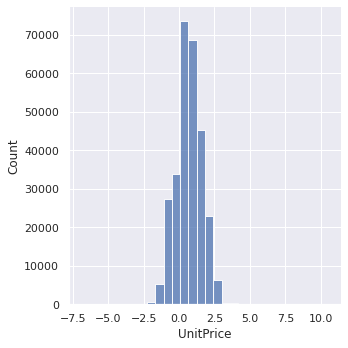

In [36]:
sns.displot(np.log(store['UnitPrice']), bins = 30) #To negate the effect of Skewness

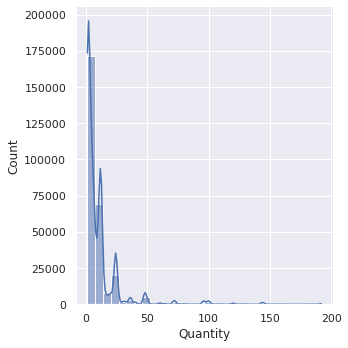

In [37]:
sns.displot(store['Quantity'],bins=30,kde=True) #Since it has many iterations of the same range of values, This data is imbalanced causing problems 
                                                #to the accuracy/rmse for the model

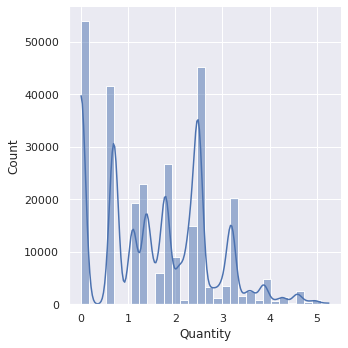

In [38]:
sns.displot(np.log(store['Quantity']), bins = 30, kde = True) #Transormation to negate the previously mentioned effects

**Scatter Plot before applying Transformations**

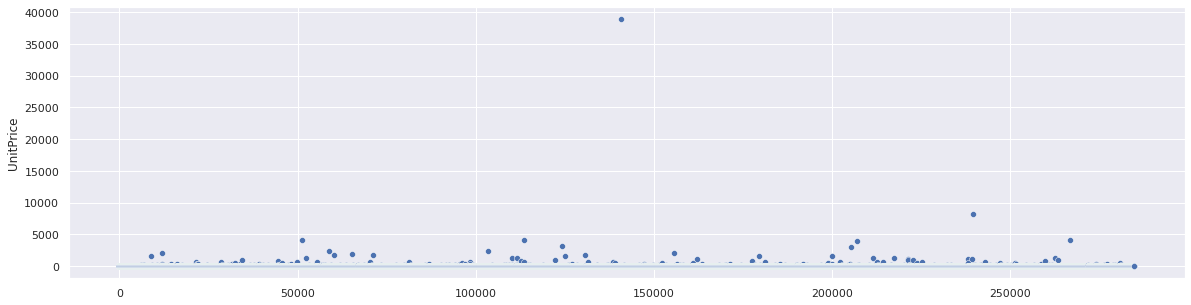

In [39]:
sns.scatterplot(data = store['UnitPrice']) #As we can see it has too many outliers

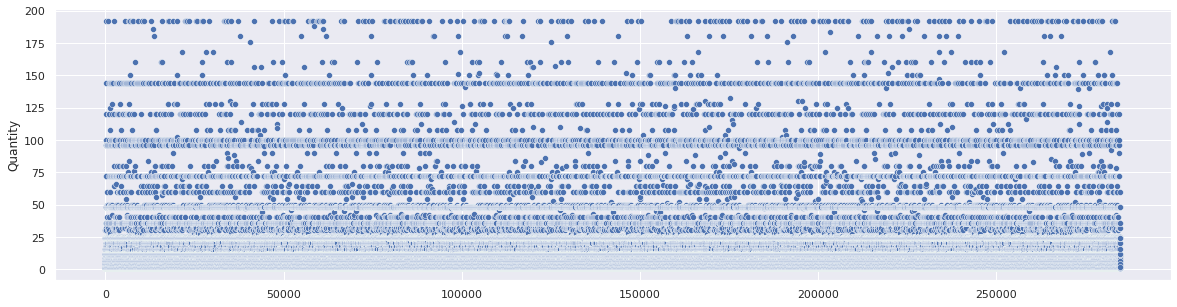

In [40]:
sns.scatterplot(data = store['Quantity'])

In [41]:
store['UnitPrice'] = np.log(store['UnitPrice'])
store['Quantity'] = np.log(store['Quantity'])

**Scatter Plots after applying Transformations**

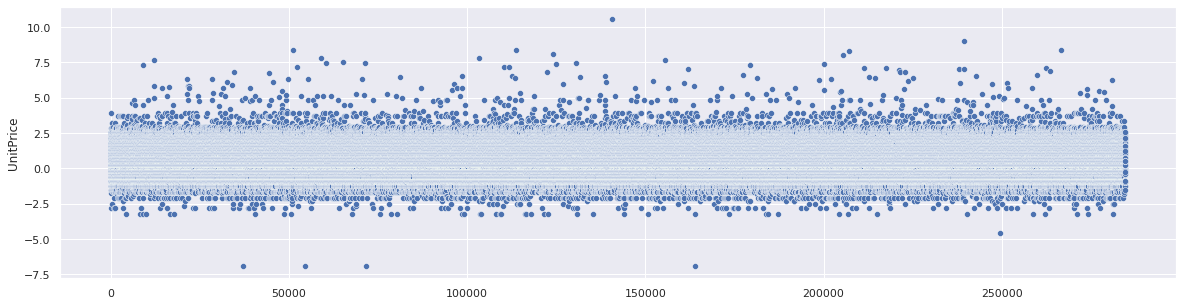

In [42]:
sns.scatterplot(data = store['UnitPrice'])

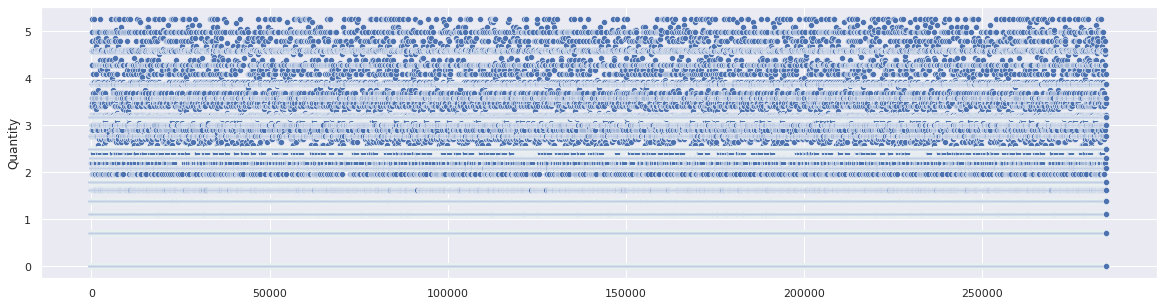

In [43]:
sns.scatterplot(data = store['Quantity'])

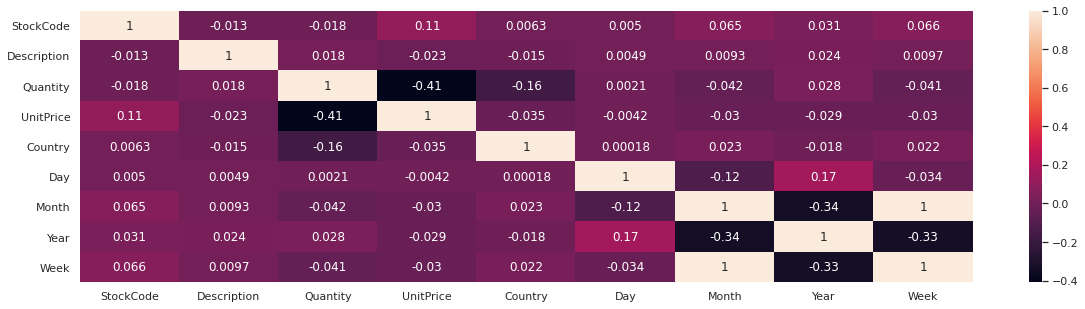

In [116]:
sns.heatmap(store.corr(),annot=True) #Correlation Matrix

From the above Correlation Matrix it is clearly visible that the Quantity is inversely proportional to the UnitPrice

**Preparing Data For the model**

In [119]:
train = store.copy()

In [120]:
X,Y = np.asarray(train.drop(['UnitPrice'],axis=1).values).astype('float32'),train['UnitPrice'] # X --> Feature Vector, Y --> Target Variable 

In [121]:
from sklearn.model_selection import train_test_split,RepeatedKFold,cross_val_score

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state = 100) #Slitting the data into 7:3 ratio for Training and Testing purposes

In [122]:
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,FunctionTransformer,QuantileTransformer

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(x_train) #Scaling the feature vector is important for any model so that it converges fast and fits quite good

In [123]:
x_train.shape

(199322, 8)

**Simple Dense Neural Network**

I chose to use a Neural Network only after applying numerous ML algorithms such as (RandomForrestRegressor, LGBM, XGBoost, KNNRegressor and plenty other simple algorithms but I wasn't satisfied with the fitting)

In [127]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model = Sequential()
model.add(Dense(512, input_dim=x_train.shape[1], activation='relu')) #Input Layer
model.add(Dense(512, activation='relu')) 
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu')) #Four Hidden Layers
model.add(Dense(1, activation='linear')) #Output Layer

In [128]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [129]:
history = model.fit(scaled_train, y_train, epochs=100, batch_size=64, validation_split=0.2)

Epoch 1/100
2492/2492 [==============================] - 26s 11ms/step - loss: 0.6734 - mse: 0.6734 - val_loss: 0.6420 - val_mse: 0.6420
Epoch 2/100
2492/2492 [==============================] - 24s 10ms/step - loss: 0.6392 - mse: 0.6392 - val_loss: 0.6541 - val_mse: 0.6541
Epoch 3/100
2492/2492 [==============================] - 24s 10ms/step - loss: 0.6211 - mse: 0.6211 - val_loss: 0.6127 - val_mse: 0.6127
Epoch 4/100
2492/2492 [==============================] - 24s 10ms/step - loss: 0.5981 - mse: 0.5981 - val_loss: 0.5880 - val_mse: 0.5880
Epoch 5/100
2492/2492 [==============================] - 24s 9ms/step - loss: 0.5767 - mse: 0.5767 - val_loss: 0.5654 - val_mse: 0.5654
Epoch 6/100
2492/2492 [==============================] - 24s 9ms/step - loss: 0.5514 - mse: 0.5514 - val_loss: 0.5572 - val_mse: 0.5572
Epoch 7/100
2492/2492 [==============================] - 24s 9ms/step - loss: 0.5281 - mse: 0.5281 - val_loss: 0.5312 - val_mse: 0.5312
Epoch 8/100
2492/2492 [=====================

**Training MSE - 0.18**
**Validation MSE - 0.22**

In [130]:
scaled_test = scaler.fit_transform(x_test)

In [133]:
y_pred = model.predict(np.array(scaled_test).astype('float32'))

In [134]:
print('min: %f\nmax: %f'%(y_pred.min(),y_pred.max()))

min: -3.016616
max: 7.758598


In [135]:
y_pred = np.around(y_pred,decimals = 2)

In [136]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(y_test,y_pred))

0.4706202491183689

**RMSE for the test data 0.47**

In [141]:
y_pred = y_pred.flatten()

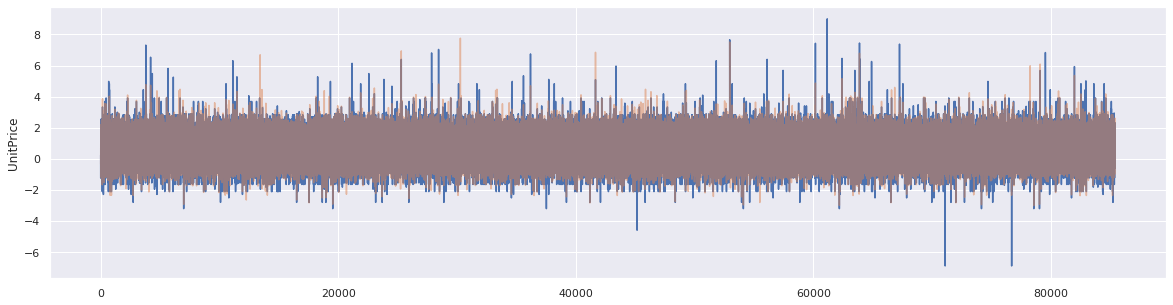

In [142]:
sns.lineplot(x = range(len(y_pred)),y = y_test, alpha = 1)
sns.lineplot(x = range(len(y_test)),y = y_pred, alpha = .5)
x1,x2,y1,y2 = plt.axis()
# plt.axis((x1,x2,-100,100))
plt.show()

The fitting seems quite satisfactory since it manages to cover the most probable regions correctly and also trying to guess a few of the outliers which are clearly wron in some of the cases clearly visible on plot.

In [175]:
test = pd.read_csv('/content/drive/My Drive/Participants_Data_TGIH/Test.csv')

In [176]:
test = prep_data(test)

In [145]:
# yhat = ee.fit_predict(test['Quantity'].values.reshape(-1,1))

In [146]:
# for i in np.where(yhat==-1):
#   test.loc[i, 'Quantity'] = test['Quantity'].median()

In [180]:
test['Quantity'][test['Quantity']<=0]

Series([], Name: Quantity, dtype: int64)

In [179]:
test['Quantity'] = test['Quantity'].abs()

In [181]:
test['Quantity'] = np.log(test['Quantity'])

In [182]:
test = scaler.fit_transform(test)

In [183]:
pred = model.predict(test)

In [184]:
pred = pd.DataFrame(pred, columns = ['UnitPrice'])

In [185]:
pred['UnitPrice'] = np.exp(pred['UnitPrice']) #Inverting the Log Transformation applied during data wrangling part

In [186]:
print('min: %f\nmax: %f'%(pred.min(),pred.max()))

min: 0.082609
max: 1874.454956


In [187]:
pred = np.around(pred,2)

In [188]:
pred.head()

,UnitPrice
0,1.48
1,1.26
2,3.65
3,1.57
4,12.11


In [189]:
pred['UnitPrice'].unique()

array([ 1.48,  1.26,  3.65, ..., 29.3 , 26.27, 18.44], dtype=float32)

In [190]:
pred.isna().value_counts()

UnitPrice
False        122049
dtype: int64

In [162]:
pred.fillna(pred.mean(),inplace=True)

In [191]:
pred.to_csv('/content/drive/My Drive/Participants_Data_TGIH/predictions22.csv', header = True, index = False)